# Data Wrangling II
Create an **Academic performance** dataset of students and perform the following operations using Python.
- 1.	Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
- 2.	Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
- 3.	Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("students_performance.csv")

In [4]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

# check for null values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df = df.rename(columns = {
    "race/ethnicity": "race",
    "parental level of education": "parent_edu",
    "test preparation course": "test_course",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
})
df

gender     race          parent_edu         lunch test_course  \
0    female  group B   bachelor's degree      standard        none   
1    female  group C        some college      standard   completed   
2    female  group B     master's degree      standard        none   
3      male  group A  associate's degree  free/reduced        none   
4      male  group C        some college      standard        none   
..      ...      ...                 ...           ...         ...   
995  female  group E     master's degree      standard   completed   
996    male  group C         high school  free/reduced        none   
997  female  group C         high school  free/reduced   completed   
998  female  group D        some college      standard   completed   
999  female  group D        some college  free/reduced        none   

     math_score  reading_score  writing_score  
0            72             72             74  
1            69             90             88  
2            90             95             93  
3            47             57             44  
4            76             78             75  
..          ...            ...            ...  
995          88             99             95  
996          62             55             55  
997          59             71             65  
998          68             78             77  
999          77             86             86  

[1000 rows x 8 columns]

# check for outliers

<Axes: ylabel='writing_score'>

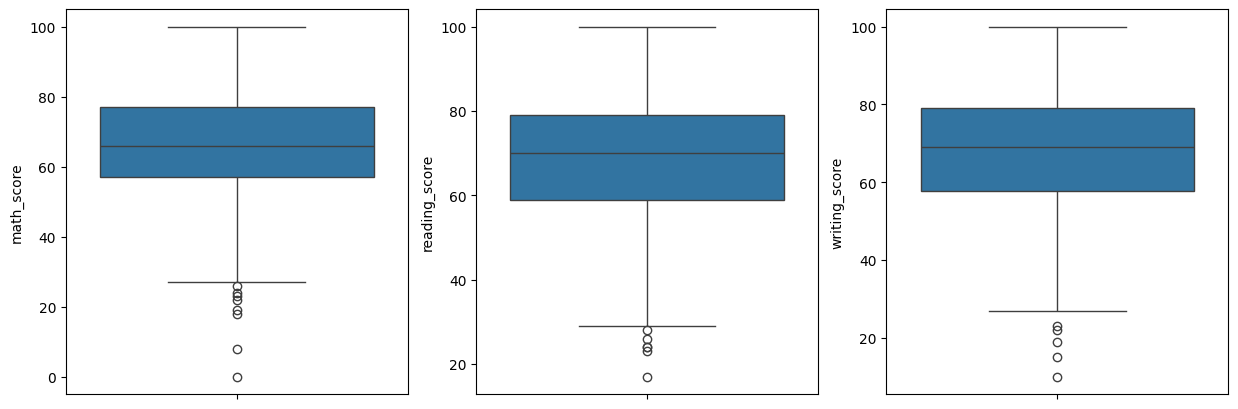

In [18]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(data=df["math_score"], ax=axes[0])
sns.boxplot(data=df["reading_score"], ax=axes[1])
sns.boxplot(data=df["writing_score"], ax=axes[2])

# remove outliers

In [20]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each score column
df = remove_outliers_iqr(df, 'math_score')
df = remove_outliers_iqr(df, 'reading_score')
df = remove_outliers_iqr(df, 'writing_score')

<Axes: ylabel='writing_score'>

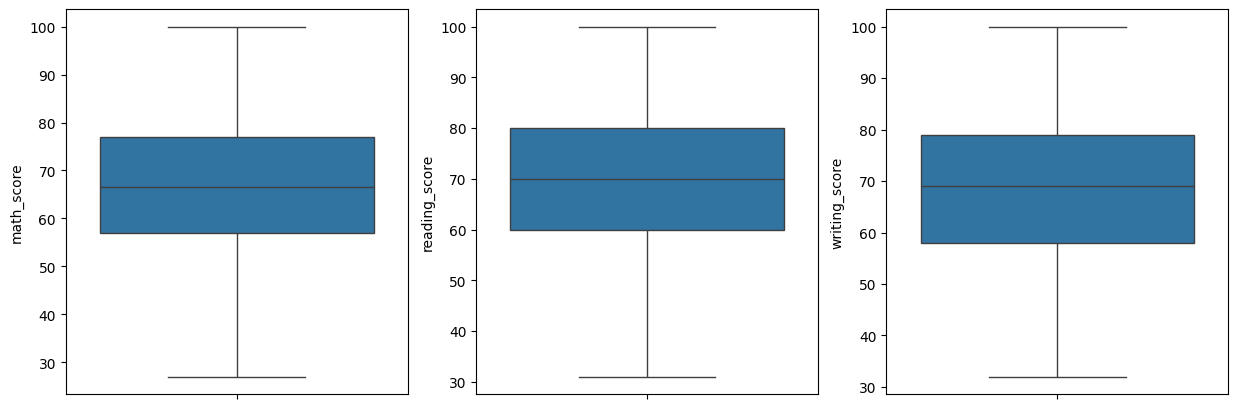

In [21]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(data=df["math_score"], ax=axes[0])
sns.boxplot(data=df["reading_score"], ax=axes[1])
sns.boxplot(data=df["writing_score"], ax=axes[2])

# Data Transformation

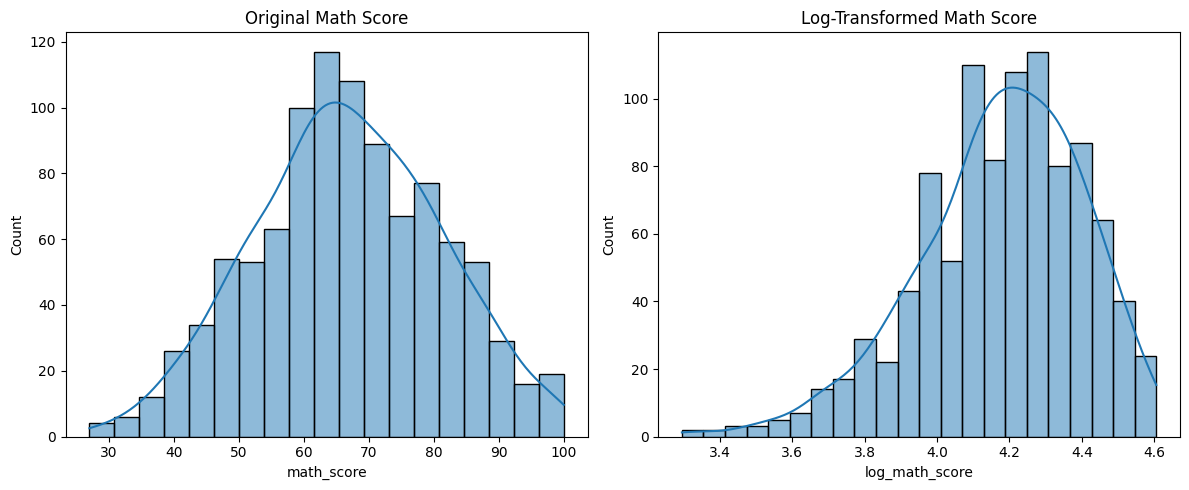

In [23]:
import numpy as np


# Apply log transformation
df['log_math_score'] = np.log(df['math_score'])

# Plot to compare original vs transformed
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['math_score'], kde=True)
plt.title('Original Math Score')

plt.subplot(1, 2, 2)
sns.histplot(df['log_math_score'], kde=True)
plt.title('Log-Transformed Math Score')

plt.tight_layout()
plt.show()


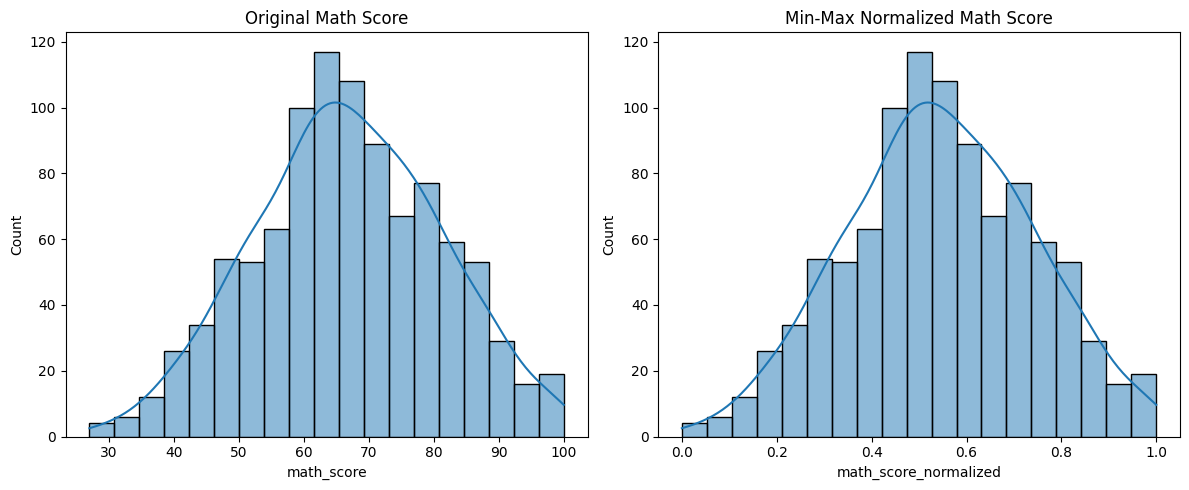

In [24]:
# Min-Max Normalization
df['math_score_normalized'] = (df['math_score'] - df['math_score'].min()) / (df['math_score'].max() - df['math_score'].min())

# Optional: plot to visualize before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['math_score'], kde=True)
plt.title('Original Math Score')

plt.subplot(1, 2, 2)
sns.histplot(df['math_score_normalized'], kde=True)
plt.title('Min-Max Normalized Math Score')

plt.tight_layout()
plt.show()
